Linear Regression Coefficient (slope): 4.6471
Intercept: 1.5294
Baseline (mean of y): 16.40

Results Table:
   Sales_Visits  New_Connections  Predicted  SHAP_Value  Baseline_plus_SHAP  \
0             2               10  10.823529   -5.576471           10.823529   
1             4               20  20.117647    3.717647           20.117647   
2             3               15  15.470588   -0.929412           15.470588   
3             2               12  10.823529   -5.576471           10.823529   
4             5               25  24.764706    8.364706           24.764706   

  Prediction_Comparison  
0        Overprediction  
1        Overprediction  
2        Overprediction  
3       Underprediction  
4       Underprediction  

Summary Analysis:
Model Accuracy (R²): 0.9842
Trend: More sales visits lead to more new connections.
SHAP Interpretation: SHAP value shows how much the number of visits moves the prediction away from the baseline.


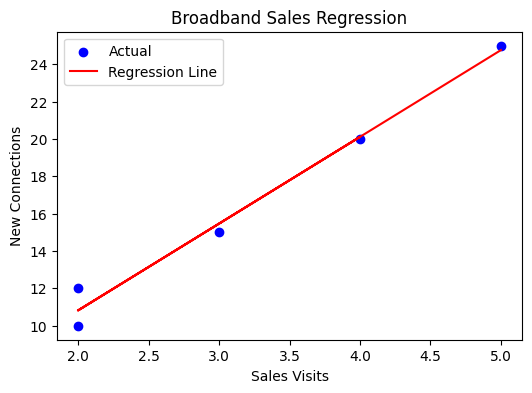

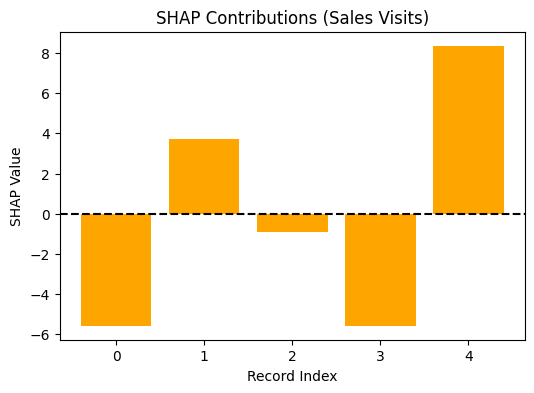

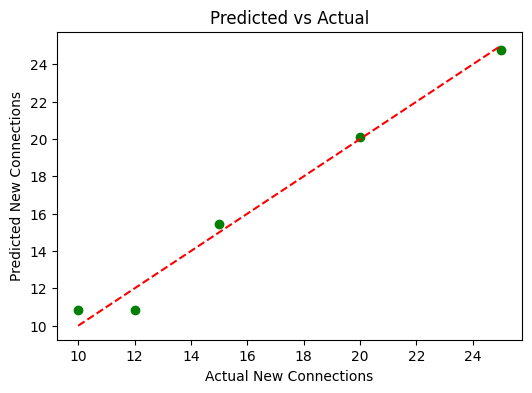

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dataset
data = pd.DataFrame({
    'Sales_Visits': [2, 4, 3, 2, 5],
    'New_Connections': [10, 20, 15, 12, 25]
})

# Independent (X) and Dependent (y) variables
X = data[['Sales_Visits']]
y = data['New_Connections']

# 1. Linear Regression Analysis
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Coefficient (slope): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# 2. Baseline Value
baseline = np.mean(y)
print(f"Baseline (mean of y): {baseline:.2f}")

# 3. Predictions & SHAP values
data['Predicted'] = model.predict(X)
data['SHAP_Value'] = data['Predicted'] - baseline
data['Baseline_plus_SHAP'] = baseline + data['SHAP_Value']

# 4. Over/Under Prediction Check
def compare(row):
    if row['Predicted'] > row['New_Connections']:
        return "Overprediction"
    elif row['Predicted'] < row['New_Connections']:
        return "Underprediction"
    else:
        return "Exact prediction"

data['Prediction_Comparison'] = data.apply(compare, axis=1)

print("\nResults Table:")
print(data)

# 5. Summary Analysis
print("\nSummary Analysis:")
print(f"Model Accuracy (R²): {model.score(X, y):.4f}")
print("Trend: More sales visits lead to more new connections.")
print("SHAP Interpretation: SHAP value shows how much the number of visits moves the prediction away from the baseline.")

# ======== GRAPHS ========

# Regression line
plt.figure(figsize=(6,4))
plt.scatter(data['Sales_Visits'], data['New_Connections'], color='blue', label="Actual")
plt.plot(data['Sales_Visits'], data['Predicted'], color='red', label="Regression Line")
plt.xlabel("Sales Visits")
plt.ylabel("New Connections")
plt.title("Broadband Sales Regression")
plt.legend()
plt.show()

# SHAP value bar chart
plt.figure(figsize=(6,4))
plt.bar(data.index, data['SHAP_Value'], color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Record Index")
plt.ylabel("SHAP Value")
plt.title("SHAP Contributions (Sales Visits)")
plt.show()

# Predicted vs Actual scatter
plt.figure(figsize=(6,4))
plt.scatter(data['New_Connections'], data['Predicted'], color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual New Connections")
plt.ylabel("Predicted New Connections")
plt.title("Predicted vs Actual")
plt.show()


Model intercept: 107.7895
Coefficients: Notifications_coef = 0.789474, AvgDeliveryTime_coef = -1.157895
Baseline (mean Retention): 77.0
R-squared on given data: 0.9853

Results table:


,Notifications,Avg_Delivery_Time,Retention,Predicted,SHAP_Notifications,SHAP_Delivery_Time,SHAP_Sum,Baseline_plus_SHAP,Check_Equals_Pred,Comparison
0,5,30,75,77.0000,0.0000,-0.0000,0.0000,77.0000,True,Overprediction
1,7,25,85,84.3684,1.5789,5.7895,7.3684,84.3684,True,Underprediction
2,4,35,70,70.4211,-0.7895,-5.7895,-6.5789,70.4211,True,Overprediction
3,6,20,90,89.3684,0.7895,11.5789,12.3684,89.3684,True,Underprediction
4,3,40,65,63.8421,-1.5789,-11.5789,-13.1579,63.8421,True,Underprediction


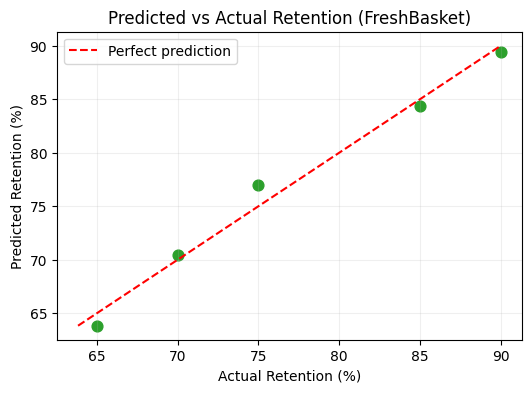

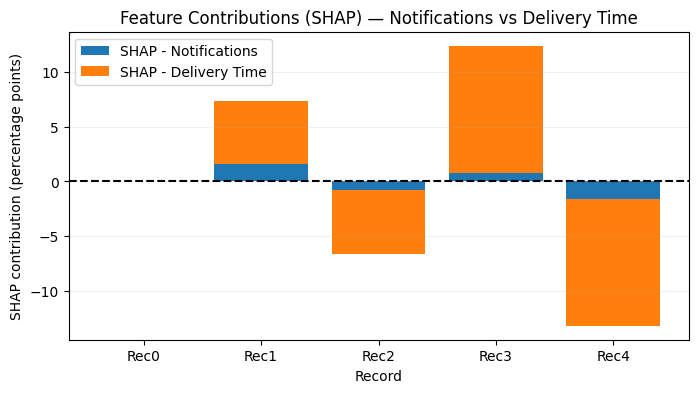

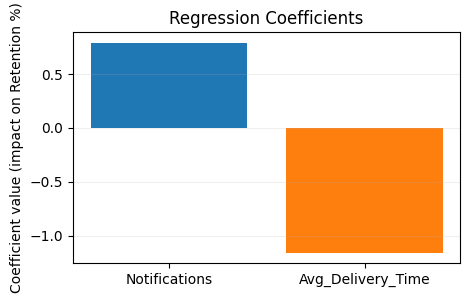

In [ ]:
# FreshBasket — Multiple Linear Regression + manual SHAP decomposition + graphs
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Data ---
data = pd.DataFrame({
    'Notifications': [5, 7, 4, 6, 3],
    'Avg_Delivery_Time': [30, 25, 35, 20, 40],
    'Retention': [75, 85, 70, 90, 65]
})

X = data[['Notifications', 'Avg_Delivery_Time']]
y = data['Retention']

# --- Fit model ---
model = LinearRegression()
model.fit(X, y)
coeffs = model.coef_
intercept = model.intercept_
r2 = model.score(X, y)

# --- Baseline (mean of y) ---
baseline = y.mean()

# --- Predictions ---
data['Predicted'] = model.predict(X)

# --- Manual SHAP decomposition using linear model coefficients
# SHAP(feature) = (x_feature - mean(x_feature)) * coef_feature
mean_X = X.mean()
data['SHAP_Notifications']   = (X['Notifications'] - mean_X['Notifications']) * coeffs[0]
data['SHAP_Delivery_Time']  = (X['Avg_Delivery_Time'] - mean_X['Avg_Delivery_Time']) * coeffs[1]
data['SHAP_Sum'] = data['SHAP_Notifications'] + data['SHAP_Delivery_Time']

# Verify: Baseline + SHAP_Sum == Predicted (numerical tolerance)
data['Baseline_plus_SHAP'] = baseline + data['SHAP_Sum']
data['Check_Equals_Pred'] = np.isclose(data['Predicted'], data['Baseline_plus_SHAP'], atol=1e-8)

# Over/Under prediction label
def comp_label(row):
    if row['Predicted'] > row['Retention']:
        return "Overprediction"
    elif row['Predicted'] < row['Retention']:
        return "Underprediction"
    else:
        return "Exact prediction"

data['Comparison'] = data.apply(comp_label, axis=1)

# --- Print model summary and table ---
pd.set_option('display.precision', 4)
print("Model intercept:", round(intercept,4))
print("Coefficients: Notifications_coef = {:.6f}, AvgDeliveryTime_coef = {:.6f}".format(coeffs[0], coeffs[1]))
print("Baseline (mean Retention):", baseline)
print("R-squared on given data:", round(r2,4))
print("\nResults table:")
display(data[['Notifications','Avg_Delivery_Time','Retention','Predicted',
              'SHAP_Notifications','SHAP_Delivery_Time','SHAP_Sum',
              'Baseline_plus_SHAP','Check_Equals_Pred','Comparison']])

# === PLOTS ===
plt.figure(figsize=(6,4))
plt.scatter(data['Retention'], data['Predicted'], s=60, c='tab:green')
mn, mx = min(data['Retention'].min(), data['Predicted'].min()), max(data['Retention'].max(), data['Predicted'].max())
plt.plot([mn,mx],[mn,mx], 'r--', label='Perfect prediction')
plt.xlabel("Actual Retention (%)")
plt.ylabel("Predicted Retention (%)")
plt.title("Predicted vs Actual Retention (FreshBasket)")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Stacked bar of SHAP contributions per record
indices = np.arange(len(data))
notif = data['SHAP_Notifications']
dt = data['SHAP_Delivery_Time']

plt.figure(figsize=(8,4))
plt.bar(indices, notif, label='SHAP - Notifications')
plt.bar(indices, dt, bottom=notif, label='SHAP - Delivery Time')
plt.axhline(0, color='k', linestyle='--')
plt.xticks(indices, ['Rec0','Rec1','Rec2','Rec3','Rec4'])
plt.xlabel("Record")
plt.ylabel("SHAP contribution (percentage points)")
plt.title("Feature Contributions (SHAP) — Notifications vs Delivery Time")
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.show()

# Coefficients bar
plt.figure(figsize=(5,3))
plt.bar(['Notifications','Avg_Delivery_Time'], coeffs, color=['tab:blue','tab:orange'])
plt.title("Regression Coefficients")
plt.ylabel("Coefficient value (impact on Retention %)")
plt.grid(axis='y', alpha=0.2)
plt.show()


Intercept: 151.34560453985995
Coefficients per feature:
  age: 37.9040
  sex: -241.9644
  bmi: 542.4288
  bp: 347.7038
  s1: -931.4888
  s2: 518.0623
  s3: 163.4200
  s4: 275.3179
  s5: 736.1989
  s6: 48.6707
Baseline (mean y_train): 153.7365
R² on test set: 0.4526

Results Table (first 10 rows):
        age      sex      bmi       bp        s1       s2       s3       s4  \
287  1.6640  10.8462  -4.3078  -5.9730 -116.9710  65.2780   3.2972   9.3422   
211  3.4539  10.8462  19.0777   7.1950   22.7327  -8.2124   0.2889 -10.9769   
72   2.3524 -12.2183  -3.1385  -4.7759  -96.4640  25.6938   9.3137  -0.8174   
321  3.5916  10.8462  27.2626  27.1506  -51.6051  19.3668 -12.3458  38.8048   
73   0.4248 -12.2183 -11.9080  -1.1846  -36.2248  27.9650  -0.9144   9.3422   
418  0.2871  10.8462 -14.2466  -9.5643  -92.6190  49.2172  11.7203  -0.8174   
367 -0.4014 -12.2183  91.5726   4.8008  -28.5347  17.9067  -3.3210   9.3422   
354 -0.9521 -12.2183  23.7548   7.1950 -102.8724  46.4592   0.2889   9

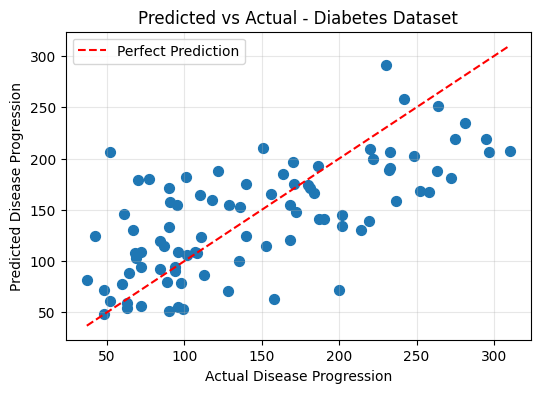

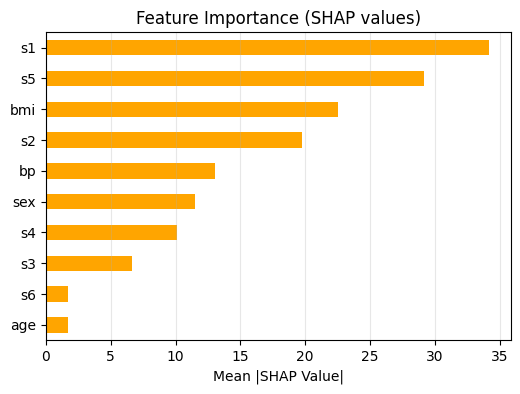

In [ ]:
# Problem 3 - Diabetes dataset regression + SHAP analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Load diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="Disease_Progression")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit MLR
model = LinearRegression()
model.fit(X_train, y_train)

coeffs = model.coef_
intercept = model.intercept_
r2 = model.score(X_test, y_test)

# 2. Baseline (mean of y_train)
baseline = y_train.mean()

# 3. Manual SHAP calculation
mean_features = X_train.mean()
shap_values = (X_test - mean_features) * coeffs  # contribution of each feature
shap_values_df = pd.DataFrame(shap_values, columns=X.columns)

# 4. Verification
shap_values_df['SHAP_Sum'] = shap_values_df.sum(axis=1)
shap_values_df['Baseline_plus_SHAP'] = baseline + shap_values_df['SHAP_Sum']
shap_values_df['Prediction'] = model.predict(X_test)
shap_values_df['Actual'] = y_test.values
shap_values_df['Check'] = np.isclose(
    shap_values_df['Prediction'], shap_values_df['Baseline_plus_SHAP'], atol=1e-8
)

# Over/Under prediction
def compare(row):
    if row['Prediction'] > row['Actual']:
        return "Overprediction"
    elif row['Prediction'] < row['Actual']:
        return "Underprediction"
    else:
        return "Exact prediction"

shap_values_df['Comparison'] = shap_values_df.apply(compare, axis=1)

# Print summary
print("Intercept:", intercept)
print("Coefficients per feature:")
for feat, coef in zip(X.columns, coeffs):
    print(f"  {feat}: {coef:.4f}")
print(f"Baseline (mean y_train): {baseline:.4f}")
print(f"R² on test set: {r2:.4f}")

print("\nResults Table (first 10 rows):")
print(shap_values_df.head(10))

# 5. Graphs

# Predicted vs Actual
plt.figure(figsize=(6,4))
plt.scatter(shap_values_df['Actual'], shap_values_df['Prediction'], c='tab:blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Predicted vs Actual - Diabetes Dataset")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Mean absolute SHAP values (feature importance)
shap_mean = shap_values_df[X.columns].abs().mean().sort_values()
plt.figure(figsize=(6,4))
shap_mean.plot(kind='barh', color='orange')
plt.xlabel("Mean |SHAP Value|")
plt.title("Feature Importance (SHAP values)")
plt.grid(axis='x', alpha=0.3)
plt.show()


Intercept: 5.968350661451387
Coefficients per feature:
  studytime: 1.9034
  Medu: 1.5390
  Fedu: 1.0827
  failures: -2.5440
  absences: -0.0794
  health: 0.4811
Baseline (mean y_train): 13.0579
R² on test set: 0.6036

Results Table:
    studytime    Medu    Fedu  failures  absences  health  SHAP_Sum  \
0      0.3569  2.8857  1.2857    -1.431   -0.2482 -0.3007    2.5483   
17     2.2602  1.3466  1.2857    -3.975   -0.4866  0.1804    0.6114   
15    -3.4499 -1.7314  2.3683     1.113   -1.2015  0.6615   -2.2400   
1      2.2602 -1.7314 -1.9623    -3.975   -0.8838  1.1425   -5.1497   

    Baseline_plus_SHAP  Prediction   Actual  Check       Comparison  
0              15.6062     15.6062  16.3521   True  Underprediction  
17             13.6693     13.6693  11.9122   True   Overprediction  
15             10.8179     10.8179  11.3722   True  Underprediction  
1               7.9082      7.9082  10.1073   True  Underprediction  


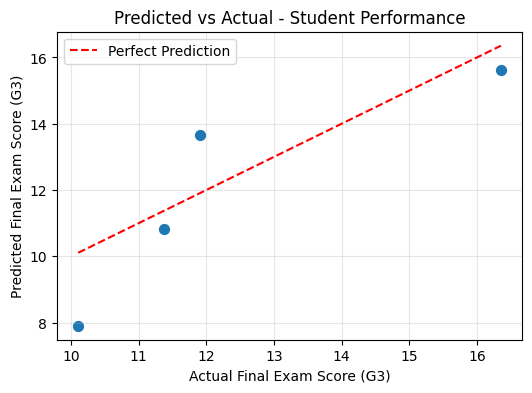

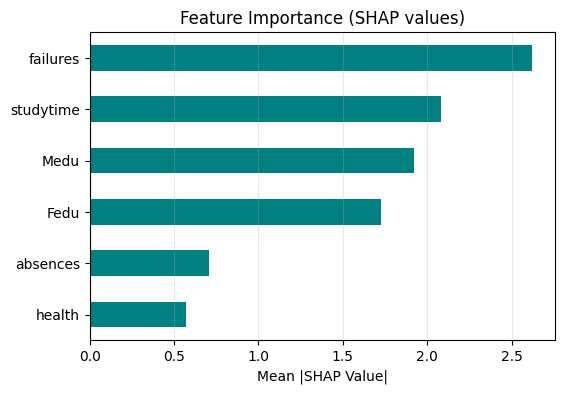

In [ ]:
# Problem 4 - Student Performance Synthetic Dataset + SHAP Analysis
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Create synthetic dataset (20 students)
np.random.seed(42)
n = 20
data = pd.DataFrame({
    'studytime': np.random.randint(1, 5, n),   # 1-4 hours category
    'Medu': np.random.randint(0, 5, n),        # mother's education 0-4
    'Fedu': np.random.randint(0, 5, n),        # father's education 0-4
    'failures': np.random.randint(0, 4, n),    # number of past failures
    'absences': np.random.randint(0, 30, n),   # absences
    'health': np.random.randint(1, 6, n),      # health rating 1-5
})

# Final exam score (G3) with influence from features + noise
data['G3'] = (
    5 +
    2.5 * data['studytime'] +
    1.5 * data['Medu'] +
    1.2 * data['Fedu'] -
    3.0 * data['failures'] -
    0.1 * data['absences'] +
    0.5 * data['health'] +
    np.random.normal(0, 2, n)
)

# 2. Train-test split
X = data.drop(columns=['G3'])
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

coeffs = model.coef_
intercept = model.intercept_
r2 = model.score(X_test, y_test)

# 4. Baseline
baseline = y_train.mean()

# 5. SHAP values (manual)
mean_features = X_train.mean()
shap_values = (X_test - mean_features) * coeffs
shap_values_df = pd.DataFrame(shap_values, columns=X.columns)

# 6. Verify Prediction = Baseline + sum(SHAPs)
shap_values_df['SHAP_Sum'] = shap_values_df.sum(axis=1)
shap_values_df['Baseline_plus_SHAP'] = baseline + shap_values_df['SHAP_Sum']
shap_values_df['Prediction'] = model.predict(X_test)
shap_values_df['Actual'] = y_test.values
shap_values_df['Check'] = np.isclose(shap_values_df['Prediction'], shap_values_df['Baseline_plus_SHAP'], atol=1e-8)

# Over/Under prediction
def compare(row):
    if row['Prediction'] > row['Actual']:
        return "Overprediction"
    elif row['Prediction'] < row['Actual']:
        return "Underprediction"
    else:
        return "Exact prediction"

shap_values_df['Comparison'] = shap_values_df.apply(compare, axis=1)

# --- OUTPUT ---
print("Intercept:", intercept)
print("Coefficients per feature:")
for feat, coef in zip(X.columns, coeffs):
    print(f"  {feat}: {coef:.4f}")
print(f"Baseline (mean y_train): {baseline:.4f}")
print(f"R² on test set: {r2:.4f}")

print("\nResults Table:")
print(shap_values_df)

# --- GRAPHS ---
# Predicted vs Actual
plt.figure(figsize=(6,4))
plt.scatter(shap_values_df['Actual'], shap_values_df['Prediction'], c='tab:blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Final Exam Score (G3)")
plt.ylabel("Predicted Final Exam Score (G3)")
plt.title("Predicted vs Actual - Student Performance")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Mean absolute SHAP values (Feature Importance)
shap_mean = shap_values_df[X.columns].abs().mean().sort_values()
plt.figure(figsize=(6,4))
shap_mean.plot(kind='barh', color='teal')
plt.xlabel("Mean |SHAP Value|")
plt.title("Feature Importance (SHAP values)")
plt.grid(axis='x', alpha=0.3)
plt.show()
